In [ ]:
# Import necessary libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.utils import to_categorical

start of week 5 code:

*   import the dataset
*   encode the target variable
*   split the data 80-20 training/testing


In [ ]:
from google.colab import files
uploaded = files.upload()


Saving studentdata.csv to studentdata.csv


In [ ]:
# Load the dataset
data = pd.read_csv('studentdata.csv')

In [ ]:
# Check for missing data
missing_data = data.isnull().sum()

# Display the missing data counts
print(missing_data[missing_data > 0])

Series([], dtype: int64)


In [ ]:
# Check the first few rows of the dataset
print(data.head())

   StudentID  Age  Gender  Ethnicity  ParentalEducation  StudyTimeWeekly  \
0       1001   17       1          0                  2        19.833723   
1       1002   18       0          0                  1        15.408756   
2       1003   15       0          2                  3         4.210570   
3       1004   17       1          0                  3        10.028829   
4       1005   17       1          0                  2         4.672495   

   Absences  Tutoring  ParentalSupport  Extracurricular  Sports  Music  \
0         7         1                2                0       0      1   
1         0         0                1                0       0      0   
2        26         0                2                0       0      0   
3        14         0                3                1       0      0   
4        17         1                3                0       0      0   

   Volunteering       GPA  GradeClass  
0             0  2.929196         2.0  
1             0  3

In [ ]:
# One-hot encode the GradeClass column
data = pd.get_dummies(data, columns=['GradeClass'], drop_first=True)

In [ ]:
data.head()

,StudentID,Age,Gender,Ethnicity,ParentalEducation,StudyTimeWeekly,Absences,Tutoring,ParentalSupport,Extracurricular,Sports,Music,Volunteering,GPA,GradeClass_1.0,GradeClass_2.0,GradeClass_3.0,GradeClass_4.0
0,1001,17,1,0,2,19.833723,7,1,2,0,0,1,0,2.929196,False,True,False,False
1,1002,18,0,0,1,15.408756,0,0,1,0,0,0,0,3.042915,True,False,False,False
2,1003,15,0,2,3,4.210570,26,0,2,0,0,0,0,0.112602,False,False,False,True
3,1004,17,1,0,3,10.028829,14,0,3,1,0,0,0,2.054218,False,False,True,False
4,1005,17,1,0,2,4.672495,17,1,3,0,0,0,0,1.288061,False,False,False,True


In [ ]:
# Split the dataset into features (X) and target (y)
X = data.drop(columns=['GradeClass_1.0', 'GradeClass_2.0', 'GradeClass_3.0', 'GradeClass_4.0'])  # Features
y = data[['GradeClass_1.0', 'GradeClass_2.0', 'GradeClass_3.0', 'GradeClass_4.0']]  # One-hot encoded target variable

# Split the data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Display the shapes of the split datasets
print('X_train shape:', X_train.shape)
print('X_test shape:', X_test.shape)
print('y_train shape:', y_train.shape)
print('y_test shape:', y_test.shape)


X_train shape: (1913, 14)
X_test shape: (479, 14)
y_train shape: (1913, 4)
y_test shape: (479, 4)


start of week 6 code

*   standardize data
*   build neural network
*  build logistic regression model

In [ ]:
# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

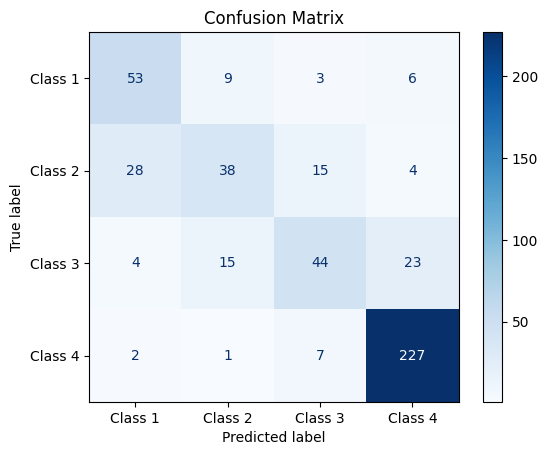

Classification Report:
               precision    recall  f1-score   support

           0       0.61      0.75      0.67        71
           1       0.60      0.45      0.51        85
           2       0.64      0.51      0.57        86
           3       0.87      0.96      0.91       237

    accuracy                           0.76       479
   macro avg       0.68      0.67      0.67       479
weighted avg       0.74      0.76      0.74       479

Accuracy: 0.755741127348643
Mean Squared Error (MSE): 0.453027139874739
Root Mean Squared Error (RMSE): 0.6730729082905796


In [ ]:
# Import necessary libraries
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, mean_squared_error, ConfusionMatrixDisplay
import numpy as np
import matplotlib.pyplot as plt

# Assuming y_train is one-hot encoded, convert it to a 1D array of labels
y_train_1d = np.argmax(y_train.values, axis=1)

# Fit the Logistic Regression model
logistic_model = LogisticRegression(max_iter=1000)
logistic_model.fit(X_train_scaled, y_train_1d)  # Use the 1D labels

# Make predictions
y_pred_prob = logistic_model.predict_proba(X_test_scaled)  # Predict probabilities for each class
y_pred = np.argmax(y_pred_prob, axis=1)  # Get predicted class labels (multiclass format)

# Convert y_test from one-hot encoding to multiclass
y_test_1d = np.argmax(y_test.values, axis=1)

# Evaluate the model (now both y_test_1d and y_pred are in multiclass format)
# Calculate the confusion matrix
conf_matrix = confusion_matrix(y_test_1d, y_pred)

# Display the confusion matrix
cmd = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=['Class 1', 'Class 2', 'Class 3', 'Class 4'])
cmd.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.show()

# Print the classification report
print("Classification Report:\n", classification_report(y_test_1d, y_pred))

# Calculate accuracy
accuracy = accuracy_score(y_test_1d, y_pred)
print("Accuracy:", accuracy)

# Calculate Mean Squared Error (MSE)
mse = mean_squared_error(y_test_1d, y_pred)
print("Mean Squared Error (MSE):", mse)

# Calculate Root Mean Squared Error (RMSE)
rmse = np.sqrt(mse)
print("Root Mean Squared Error (RMSE):", rmse)


In [ ]:
#model with relu/softmax activation, two hidden layers, L2 regularization 0.1, 16 neurons in first layer, 8 neurons in second layer
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, BatchNormalization
from tensorflow.keras.regularizers import l2

# Build the Neural Network model
model = Sequential()

# First hidden layer
model.add(Dense(16, activation='relu', input_shape=(X_train_scaled.shape[1],), kernel_regularizer=l2(0.1)))  # Input layer with 128 neurons and L2 regularization
model.add(BatchNormalization())  # Optional: Add Batch Normalization

# Second hidden layer
model.add(Dense(8, activation='relu', kernel_regularizer=l2(0.1)))  # Third hidden layer with 32 neurons and L2 regularization
model.add(BatchNormalization())  # Optional: Add Batch Normalization

# Output layer
model.add(Dense(y_train.shape[1], activation='softmax'))  # Output layer with Softmax activation

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(X_train_scaled, y_train, epochs=50, batch_size=32, validation_split=0.2)

# Evaluate the model on the test data
test_loss, test_accuracy = model.evaluate(X_test_scaled, y_test)

# Evaluate the model on the test set
test_loss, test_accuracy = model.evaluate(X_test_scaled, y_test)

# Print the test accuracy
print(f'Test Accuracy: {test_accuracy:.4f}')
print(f'Test Loss: {test_loss:.4f}')

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/50
48/48 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - accuracy: 0.3159 - loss: 4.0905 - val_accuracy: 0.2768 - val_loss: 3.6202
Epoch 2/50
48/48 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.4433 - loss: 3.3657 - val_accuracy: 0.5144 - val_loss: 2.9483
Epoch 3/50
48/48 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.5727 - loss: 2.7603 - val_accuracy: 0.6214 - val_loss: 2.4631
Epoch 4/50
48/48 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6102 - loss: 2.3308 - val_accuracy: 0.6397 - val_loss: 2.0933
Epoch 5/50
48/48 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6298 - loss: 1.9848 - val_accuracy: 0.6397 - val_loss: 1.8062
Epoch 6/50
48/48 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6803 - loss: 1.6656 - val_accuracy: 0.6110 - val_loss: 1.5830
Epoch 7/50
48/48 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6827 - loss: 1.4436 - val_accuracy: 0.6136 - val_loss: 1.4092
Epoch 8/50
48/48 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7372 - loss: 1.2175 - val_accuracy: 0.6031 - val_loss

15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step


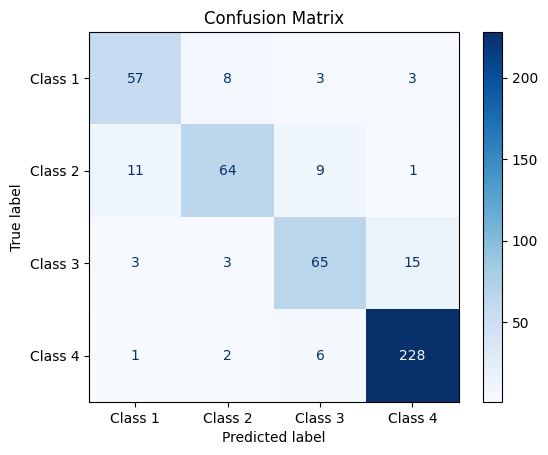

15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8588 - loss: 0.4508 
Test Accuracy: 0.8643
Test Loss: 0.4344
              precision    recall  f1-score   support

           0       0.79      0.80      0.80        71
           1       0.83      0.75      0.79        85
           2       0.78      0.76      0.77        86
           3       0.92      0.96      0.94       237

    accuracy                           0.86       479
   macro avg       0.83      0.82      0.82       479
weighted avg       0.86      0.86      0.86       479



In [ ]:
# Make predictions
y_pred_prob = model.predict(X_test_scaled)  # Get predicted probabilities
y_pred = np.argmax(y_pred_prob, axis=1)  # Get the predicted class labels
y_true = np.argmax(y_test.values, axis=1)  # Get true class labels

# Compute the confusion matrix
conf_matrix = confusion_matrix(y_true, y_pred)

# Display the confusion matrix
cmd = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=['Class 1', 'Class 2', 'Class 3', 'Class 4'])
cmd.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.show()

# Evaluate the model on the test set
test_loss, test_accuracy = model.evaluate(X_test_scaled, y_test)

# Print the test accuracy
print(f'Test Accuracy: {test_accuracy:.4f}')
print(f'Test Loss: {test_loss:.4f}')

# Convert one-hot encoded labels to class labels
y_test_classes = np.argmax(y_test.values, axis=1)
y_pred_classes = np.argmax(y_pred_prob, axis=1)

# Print classification report
print(classification_report(y_test_classes, y_pred_classes))